# Lecture 14 & 15

## More on Random Number Generation and Uniform Distributions

### Problem 9 (Continued)

2. Use of random numbers:  Generate uniform random numbers and draw the histogram. Check the flatness of the obtained probability density.

Here, we analyse the statistical fluctuations in the distribution of uniformly generated random numbers by dividing the interval $[0, 1)$ into equal-width bins and measuring how the number of samples per bin deviates from the expected uniform value. For a given number of samples $N$, each value is assigned to a bin based on its magnitude, and the resulting bin counts are normalised to approximate a probability density. The standard deviation of these normalised bin counts quantifies the deviation from a perfectly flat (uniform) distribution. As $N$ increases, the fluctuations decrease, reflecting the **law of large numbers**. By plotting the standard deviation against $N$ on a log-log scale, we see that that the deviation scales approximately as $1/\sqrt{N}$, consistent with statistical expectations for independent random sampling.

### Law of Large Numbers

Say we pick $N$ random numbers from a probability distribution $P(x)$ (can be continuous or discrete) $x_1, x_2, ..., x_n$. The arithmetic mean is given by $x_n = \frac{1}{n} \sum x_i$ (also called sample mean). We also have a population mean $\mu$ coming from the probability distribution. The law of large numbers is given by

**Strong Form:** $P(|\bar{x_n} - \mu| < \epsilon) = 1$. A deviation less than $\epsilon$ is always certain if $n \to \infty$

**Weak Form:** $P(\lim_{n \to \infty} \bar{x_n} = \mu) = 1$

THis comes from the ***central limit theorem*** but tells us nothing about $N$ dependence. For $N \to \infty$, $P(\bar{x_n}) = Ae^{\frac{-(\bar{x_n} - \mu)^{2}}{2\sigma^{2}/N}}$, wehre $A$ is the normalisation. No matter what $P(x)$ is, this holds true. So, the probability distribution is Gaussian for very large numbers. 

The sharpness of the distribution increases by varying $N$ as standard deviation $\propto \frac{1}{\sqrt{N}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def gen_hist(N, bin_int, lab, plot = False):
    rand_num = np.random.random(N)
    bin_count = np.zeros(int(1/bin_int))
    for i in rand_num:
        n = int(i/bin_int)
        bin_count[n] += 1 # binning each number by simple floor division and increments the appropriate bin
    std_dev = np.std(bin_count/N) # normalising bin counts to convert to a probability density approximation and then calculating the standard deviation

    if plot:
        plt.scatter(np.arange(len(bin_count)) * bin_int, bin_count/N, label = lab)
        plt.axhline(bin_int, color = 'midnightblue', ls = '--')
        plt.title(r'Measuring the Flatness of the Distribution for each $N$')
        plt.xlabel(r'$r$ (Multiples of Bin Interval)')
        plt.ylabel(r'# of Random Numbers in Each Bin (Normalised)')
        plt.grid(True)
        plt.legend()

    return std_dev

0.027568097504180437 10.0
0.009110433579144298 31.622776601683793
0.0019804039991880456 100.0
0.0006839298209611886 316.22776601683796


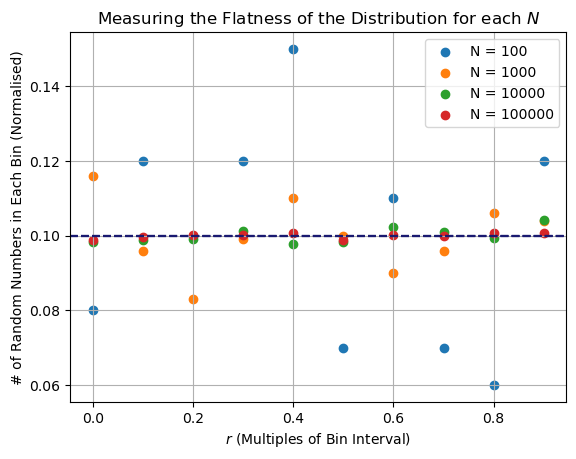

In [40]:
print(gen_hist(100, 0.1, 'N = 100', plot = 'True'), np.sqrt(100))
print(gen_hist(1000, 0.1, 'N = 1000', plot = 'True'), np.sqrt(1000))
print(gen_hist(10000, 0.1, 'N = 10000', plot = 'True'), np.sqrt(10000))
print(gen_hist(100000, 0.1, 'N = 100000', plot = 'True'), np.sqrt(100000))

The dashed line represents the bin interval.

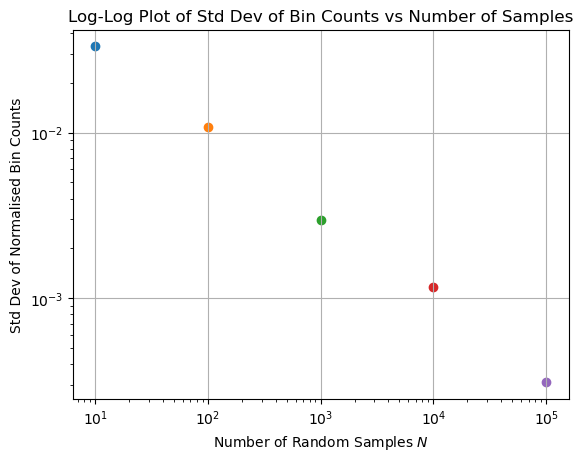

In [41]:
for i in range(1, 6):
    plt.scatter(10**i, gen_hist(10**i, 0.01, None))
    plt.title('Log-Log Plot of Std Dev of Bin Counts vs Number of Samples')
    plt.xlabel(r'Number of Random Samples $N$')
    plt.ylabel(r'Std Dev of Normalised Bin Counts')
    plt.grid(True)
    plt.yscale('log')
    plt.xscale('log')